In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [16]:
df=pd.read_excel(r"C:\Users\Ramana Reddy (Rakhi)\OneDrive\Desktop\crypto project\btc_coin.xlsx")

In [17]:
df.head()

,ticker,date,open,high,low,close
0,BTC,2017-01-01,963.38,1001.61,956.10,995.44
1,BTC,2017-01-02,995.44,1031.68,990.20,1017.05
2,BTC,2017-01-03,1017.05,1035.47,1006.53,1033.30
3,BTC,2017-01-04,1033.30,1148.54,1022.32,1135.41
4,BTC,2017-01-05,1135.41,1150.63,874.53,989.35


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2738 entries, 0 to 2737
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ticker  2738 non-null   object        
 1   date    2738 non-null   datetime64[ns]
 2   open    2738 non-null   float64       
 3   high    2738 non-null   float64       
 4   low     2738 non-null   float64       
 5   close   2738 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 128.5+ KB


In [19]:
df.describe()

,open,high,low,close
count,2738.000000,2738.000000,2738.000000,2738.000000
mean,21871.361282,22406.203824,21301.781516,21894.314803
std,18733.654476,19166.988482,18265.170682,18745.369958
min,785.430000,826.430000,739.550000,785.430000
25%,7139.107500,7325.185000,6900.737500,7145.115000
50%,13810.100000,14414.700000,13092.900000,13832.950000
75%,34586.375000,35651.925000,33462.900000,34600.175000
max,72988.300000,73672.600000,71041.100000,72987.600000


In [20]:
df['date']=pd.to_datetime(df['date'])
df.set_index('date',inplace=True)

In [21]:
df.head()

,ticker,open,high,low,close
date,,,,,
2017-01-01,BTC,963.38,1001.61,956.10,995.44
2017-01-02,BTC,995.44,1031.68,990.20,1017.05
2017-01-03,BTC,1017.05,1035.47,1006.53,1033.30
2017-01-04,BTC,1033.30,1148.54,1022.32,1135.41
2017-01-05,BTC,1135.41,1150.63,874.53,989.35


In [22]:
indexedDataset=df.drop(columns=['ticker','open','high','low'])
indexedDataset.head()

,close
date,
2017-01-01,995.44
2017-01-02,1017.05
2017-01-03,1033.30
2017-01-04,1135.41
2017-01-05,989.35


# converting days data to months data

In [23]:
indexedDataset=indexedDataset.resample('M').mean()
indexedDataset

,close
date,
2017-01-31,909.679355
2017-02-28,1061.324643
2017-03-31,1129.273871
2017-04-30,1215.241000
2017-05-31,1877.569677
...,...
2024-02-29,49807.727586
2024-03-31,67675.335484
2024-04-30,65683.720000


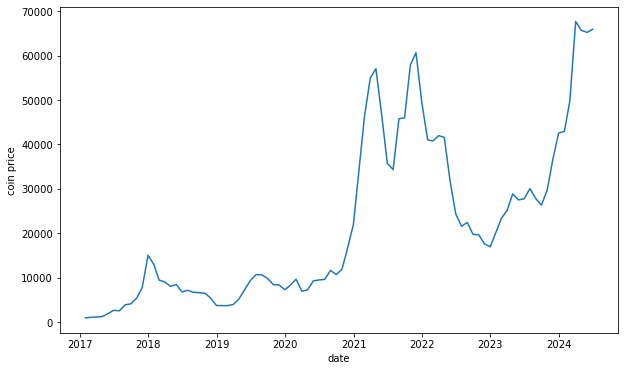

In [24]:
plt.xlabel('date')
plt.ylabel('coin price')
plt.plot(indexedDataset)

In [27]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #determing rolling statistics
    moving_avg=timeseries.rolling(window=12).mean()
    moving_std = timeseries.rolling(window=12).std()
    
    #plot rolling statistics
    #orig=plt.plot(timeseries,color='blue',label='Original')
    #mean=plt.plot(moving_avg,color='red',label='rolling mean' )
    #std=plt.plot(moving_std,color='black',label='rolling std')
    #plt.legend(loc='best')
    #plt.show(block=False)
    #perform Dickey fuller test;
    print("results of Dickey-fuller test:")
    dftest=adfuller(timeseries['close'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test statistic','p-value','lags used','number of Observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)'%key]=value
    print(dfoutput)

In [28]:
test_stationarity(indexedDataset)

results of Dickey-fuller test:
Test statistic                 -0.814228
p-value                         0.814907
lags used                       2.000000
number of Observations used    87.000000
Critical value (1%)            -3.507853
Critical value (5%)            -2.895382
Critical value (10%)           -2.584824
dtype: float64


# our data is not stationary so we should convert data into stationary

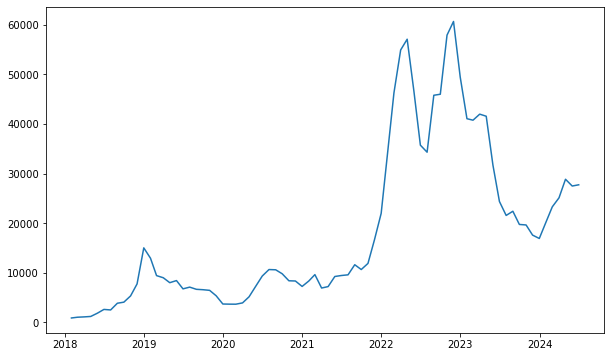

In [31]:
#estimating trend
indexedDataset_shift=indexedDataset.shift(12).dropna()
plt.plot(indexedDataset_shift)

In [32]:
test_stationarity(indexedDataset_shift)

results of Dickey-fuller test:
Test statistic                 -1.681148
p-value                         0.440851
lags used                       2.000000
number of Observations used    75.000000
Critical value (1%)            -3.520713
Critical value (5%)            -2.900925
Critical value (10%)           -2.587781
dtype: float64


In [33]:
indexedDataset_logscale=np.log(indexedDataset_shift)

In [34]:
test_stationarity(indexedDataset_logscale)

results of Dickey-fuller test:
Test statistic                 -2.356997
p-value                         0.154243
lags used                       1.000000
number of Observations used    76.000000
Critical value (1%)            -3.519481
Critical value (5%)            -2.900395
Critical value (10%)           -2.587498
dtype: float64


In [35]:
moving_avg=indexedDataset_logscale.rolling(window=12).mean()
datasetlogscale_moving_avg=indexedDataset_logscale-moving_avg
datasetlogscale_moving_avg.head(12)
#remove nan values
datasetlogscale_moving_avg.dropna(inplace=True)

In [36]:
 test_stationarity(datasetlogscale_moving_avg)

results of Dickey-fuller test:
Test statistic                 -2.830261
p-value                         0.054079
lags used                       6.000000
number of Observations used    60.000000
Critical value (1%)            -3.544369
Critical value (5%)            -2.911073
Critical value (10%)           -2.593190
dtype: float64


# Seasonal Decompose

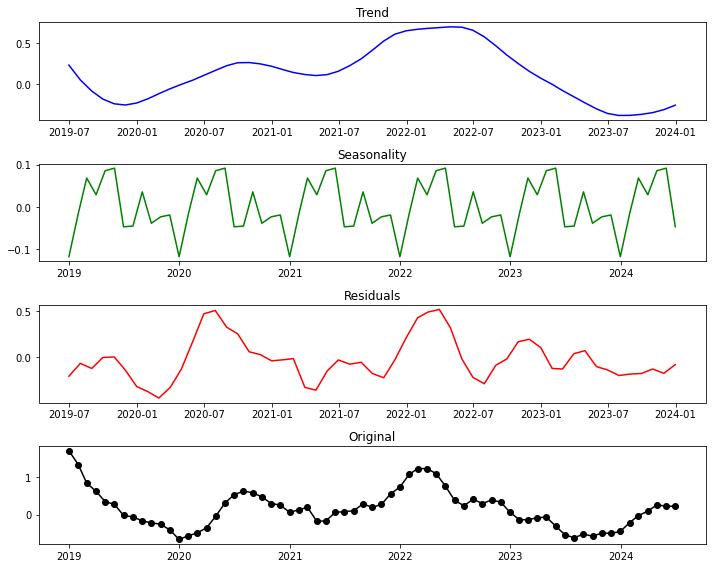

In [37]:
decomposition = seasonal_decompose(datasetlogscale_moving_avg, model='additive')
plt.figure(figsize=(10,8))

plt.subplot(4, 1, 1)
plt.plot(decomposition.trend, label='Trend', color='blue')
plt.title('Trend')

plt.subplot(4, 1, 2)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.title('Seasonality')

plt.subplot(4, 1, 3)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.title('Residuals')

plt.subplot(4, 1, 4)
plt.plot(datasetlogscale_moving_avg.index, datasetlogscale_moving_avg.values, marker='o', linestyle='-', label='Original', color='black')
plt.title('Original')

plt.tight_layout()
plt.show()

# AUTO CORRELATION AND PARTIAL AUTOCORRELATION graphs

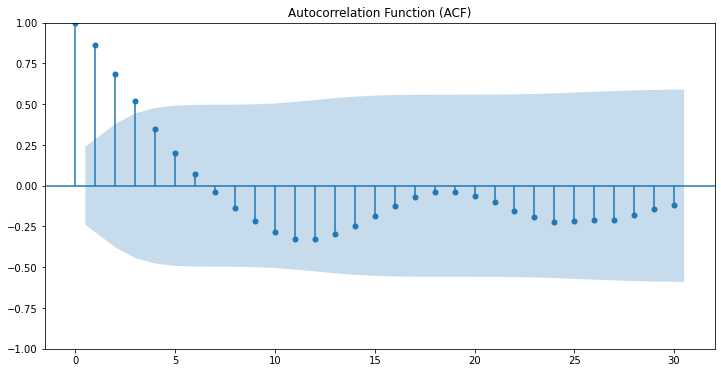

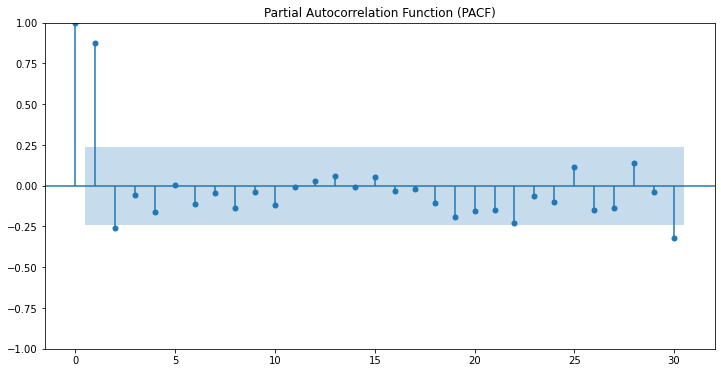

In [40]:
import statsmodels.api as sm

# Plot ACF
fig, ax1 = plt.subplots(figsize=(12, 6))
sm.graphics.tsa.plot_acf(datasetlogscale_moving_avg['close'], lags=30, ax=ax1)
plt.title('Autocorrelation Function (ACF)')

# Plot PACF
fig, ax2 = plt.subplots(figsize=(12, 6))
sm.graphics.tsa.plot_pacf(datasetlogscale_moving_avg['close'], lags=30, ax=ax2)
plt.title('Partial Autocorrelation Function (PACF)')

plt.show()

In [41]:
# Split data into train and test sets
X = np.arange(len(datasetlogscale_moving_avg)).reshape(-1, 1)
y = datasetlogscale_moving_avg.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(53, 1)
(53, 1)
(14, 1)
(14, 1)


In [43]:
!pip install pmdarima
from pmdarima import auto_arima
stepwise=auto_arima(datasetlogscale_moving_avg,trace=True,suppress_warnings=True)
stepwise.summary()

  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Ramana Reddy (Rakhi)\\anaconda3\\Lib\\site-packages\\~=mpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-49.872, Time=0.66 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=103.910, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-25.460, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=35.652, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=108.324, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-43.739, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-49.454, Time=0.30 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-45.464, Time=0.64 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-46.679, Time=0.41 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-43.460, Time=0.18 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-47.462, Time=0.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-46.538, Time=0.32 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-44.907, Time=0.61 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-48.196, Time=0.24 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] intercept
T

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   67
Model:               SARIMAX(2, 0, 2)   Log Likelihood                  30.936
Date:                Thu, 22 Aug 2024   AIC                            -49.872
Time:                        22:01:31   BIC                            -36.644
Sample:                    12-31-2018   HQIC                           -44.638
                         - 06-30-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0095      0.003      2.804      0.005       0.003       0.016
ar.L1          1.9267      0.030     64.343      0.000       1.868       1.985
ar.L2         -0.9670      0.025    -38.227      0.000      -1.017      -0.917
ma.L1         -0.5280      0.177     -2.980      0.003      -0.875      -0.181
ma.L2         -0.3850      0.155     -2.491      0.013      -0.688      -0.082
sigma2         0.0215      0.005      4.768      0.000       0.013       0.030
===================================================================================
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):                 0.66
Prob(Q):                              0.56   Prob(JB):                         0.72
Heteroskedasticity (H):               0.61   Skew:                            -0.01
Prob(H) (two-sided):                  0.26   Kurtosis:                         2.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# ARIMA MODEL BUILDING 

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   53
Model:                 ARIMA(4, 0, 3)   Log Likelihood                  24.049
Date:                Thu, 22 Aug 2024   AIC                            -30.099
Time:                        22:26:08   BIC                            -12.366
Sample:                             0   HQIC                           -23.280
                                 - 53                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3550      0.154      2.300      0.021       0.053       0.658
ar.L1          0.7392      0.282      2.624      0.009       0.187       1.291
ar.L2         -0.0854      0.378     -0.226      0.8

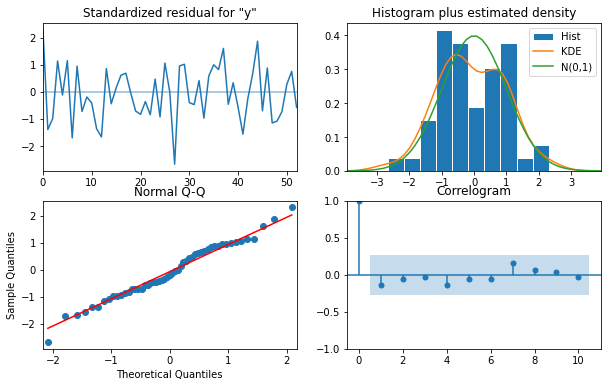

In [156]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(y_train,order=(4,0,3))
results_ARIMA=model.fit()
predicion=results_ARIMA.plot_diagnostics()
print(results_ARIMA.summary())
 

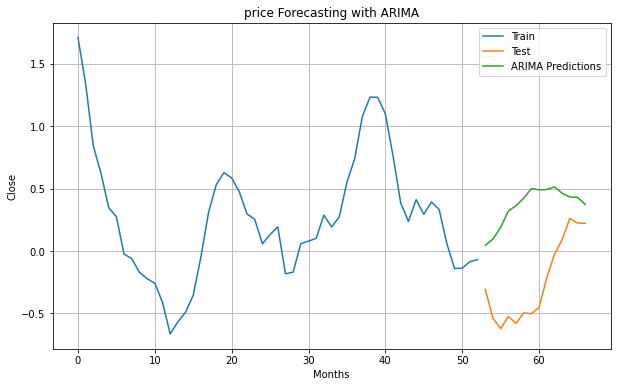

In [157]:
arima_predictions =results_ARIMA.forecast(steps=len(X_test))
# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, label='Train')
plt.plot(X_test, y_test, label='Test')
plt.plot(X_test, arima_predictions, label='ARIMA Predictions')
plt.title('price Forecasting with ARIMA')
plt.xlabel('Months')
plt.ylabel('Close')
plt.legend()
plt.grid(True)
plt.show()

In [158]:
print(mean_absolute_error(X_test,arima_predictions))
print(mean_squared_error(X_test,arima_predictions))
print(r2_score(X_test,arima_predictions))

59.13407809097388
3512.2493867855396
-215.13842380218705
